In [4]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib as plt
%matplotlib inline
import plotly.express as pxb

## Setting Up

In [5]:
df = pd.read_excel("datajam.xlsx") ## replace with path to dataset 
df.dropna(axis=1, how='all')
df = df.loc[:, (df != 0).any(axis=0)]

Select only the columns that contain information about the type of trash:

In [53]:
trash_type_columns = [ 'Cigarettes/Cigarette Filters',
 'Food Wrappers/Containers',
 'Takeout Containers (Plastic) ',
 'Takeout Containers (Foam) ',
 'Bottle Caps (Plastic) ',
 'Bottle Caps (Metal)',
 'Bottle Caps (plastic and metal - 2017 onwards)',
 'Lids (Plastic)',
 'Straws, Stirrers (Straws from 2017 onwards)',
 'Forks, Knives, Spoons (Utensils from 2017 onwards)',
 'Beverage Bottles (Plastic) 2 liters or less (Plastic bottles from 2017 onwards)',
 'Glass Beverage Bottles',
 'Beverage Cans',
 'Bags (Plastic) (Plastic bags from 2017 onwards)',
 'Other plastic bags',
 'Bags (Paper) (Paper from 2017 onwards)',
 'Coffee cups',
 'Cups and Plates (Paper)',
 'Cups and Plates (Plastic) (Plastic cup from 2017 onwards)',
 'Cups and Plates (Foam)',
 'Buoys/Floats (fishing buoy, pot, or trap from 2017 onwards)',
 'Fishing Nets',
 'Rope',
 'Fishing Line',
 'Fishing Lures/Light Sticks',
 '6-Pack Holders',
 'Other  Plastic/Foam Packaging (Other/Misc Packaging 2017 onwards)',
 'Other Plastic Bottles (oil, bleach etc) (Containers for 2017 onwards)',
 'Strapping Bands',
 'Tobacco Packaging/Wrappers',
 'Appliances (refrigerators, washers, etc.)',
 'Balloons',
 'Cigar Tips',
 'Cigarette Lighters',
 'Building Materials',
 'Fireworks',
 'Tires',
 'Toys',
 'Batteries',
 'Clothing, Shoes',
 'Foam (2017 onwards)',
 'Personal hygiene (2017 onwards)',
 'Condoms',
 'Diapers',
 'Syringes',
 'Tampons/Tampon Applicators',
 'Foam Pieces',
 'Glass Pieces',
 'Plastic Pieces',
 'Tiny Plastic or Foam (2017 onwards)',
'55-Gallon Drums',
 'Car/Car Parts',
 'Light Bulbs',
 'Pallets',
 'Plastic Sheeting',
 'Crates',
 'Pull Tabs',
 'Bait Containers',
 'Crab/Lobster/Fish Traps',
 'Shotgun Shells']

# Categories by Industry
hospitality = ['Food Wrappers/Containers','Bottle Caps (plastic and metal - 2017 onwards)','Lids (Plastic)',\
             'Straws, Stirrers (Straws from 2017 onwards)','Forks, Knives, Spoons (Utensils from 2017 onwards)',\
             'Beverage Bottles (Plastic) 2 liters or less (Plastic bottles from 2017 onwards)', \
             'Cups and Plates (Plastic) (Plastic cup from 2017 onwards)']
household = ['Personal hygiene (2017 onwards)','Clothing, Shoes','Toys','Tires',\
             'Other Plastic Bottles (oil, bleach etc) (Containers for 2017 onwards)','Bags (Plastic) (Plastic bags from 2017 onwards)']
leisure = ['Buoys/Floats (fishing buoy, pot, or trap from 2017 onwards)','Fishing Nets','Balloons',\
          '6-Pack Holders']
other = ['Other','Tiny Plastic or Foam (2017 onwards)','Foam (2017 onwards)','Coffee cups',\
        'Other  Plastic/Foam Packaging (Other/Misc Packaging 2017 onwards)']
non_plastic = ['Bags (Paper) (Paper from 2017 onwards)', 'Beverage Cans','Glass Beverage Bottles','Cigarettes/Cigarette Filters','Rope']

food_and_beverage = ['Food Wrappers/Containers',
 'Takeout Containers (Plastic) ',
 'Takeout Containers (Foam) ',
 'Bottle Caps (Plastic) ',
 'Bottle Caps (Metal)',
 'Bottle Caps (plastic and metal - 2017 onwards)',
 'Lids (Plastic)',
 'Straws, Stirrers (Straws from 2017 onwards)',
 'Forks, Knives, Spoons (Utensils from 2017 onwards)',
 'Beverage Bottles (Plastic) 2 liters or less (Plastic bottles from 2017 onwards)',
 'Glass Beverage Bottles',
 'Beverage Cans',
 'Bags (Plastic) (Plastic bags from 2017 onwards)',
 'Other plastic bags',
 'Bags (Paper) (Paper from 2017 onwards)',
 'Coffee cups',
 'Cups and Plates (Paper)',
 'Cups and Plates (Plastic) (Plastic cup from 2017 onwards)',
 'Cups and Plates (Foam)',
 '6-Pack Holders']

water_activities = ['Buoys/Floats (fishing buoy, pot, or trap from 2017 onwards)',
 'Fishing Nets',
 'Rope',
 'Fishing Line',
 'Fishing Lures/Light Sticks',
 'Bait Containers',
 'Crab/Lobster/Fish Traps',
'55-Gallon Drums','Pallets'
]

other_usage = [x for x in trash_type_columns if x not in food_and_beverage and x not in water_activities]

usages = {
    "Food and Beverage": food_and_beverage,
    "Water Activities": water_activities,
    "Other": other_usage
}


Compute month and season columns:

In [54]:
df['month'] = pd.DatetimeIndex(df['Cleanup date']).month

def get_season(s):
    if (s['month'] == 12 or s['month'] <= 2):
        return 'winter'
    if (s['month'] >= 3) and (s['month'] <= 5):
        return 'spring'
    if (s['month'] >= 6) and (s['month'] <= 8):
        return 'summer'
    if (s['month'] >= 9) and (s['month'] <= 11):
        return 'fall'
    else:
        return None

df['season'] = df.apply(get_season, axis=1)

Sanity check to make sure this is equal to the [2019 posted data](https://www.shorelinecleanup.ca/impact-visualized-data)

In [55]:
df.loc[df['Year'] == 2019][trash_type_columns].sum().sort_values(ascending=False).head(12)

Cigarettes/Cigarette Filters                                                       686055.0
Tiny Plastic or Foam (2017 onwards)                                                595227.0
Food Wrappers/Containers                                                            74224.0
Bags (Paper) (Paper from 2017 onwards)                                              63371.0
Bottle Caps (plastic and metal - 2017 onwards)                                      51992.0
Bags (Plastic) (Plastic bags from 2017 onwards)                                     31164.0
Beverage Cans                                                                       28192.0
Beverage Bottles (Plastic) 2 liters or less (Plastic bottles from 2017 onwards)     26212.0
Straws, Stirrers (Straws from 2017 onwards)                                         26157.0
Foam (2017 onwards)                                                                 24213.0
Other  Plastic/Foam Packaging (Other/Misc Packaging 2017 onwards)               

## Most common types of waste
### Most common types of waste per year

In [57]:
df.groupby(['Year'])[trash_type_columns].sum().apply(lambda x: pd.Series(x.nlargest(5).index), axis=1).T

Year,2017,2018,2019
0,Tiny Plastic or Foam (2017 onwards),Cigarettes/Cigarette Filters,Cigarettes/Cigarette Filters
1,Cigarettes/Cigarette Filters,Tiny Plastic or Foam (2017 onwards),Tiny Plastic or Foam (2017 onwards)
2,Beverage Bottles (Plastic) 2 liters or less (P...,Food Wrappers/Containers,Food Wrappers/Containers
3,Food Wrappers/Containers,Bottle Caps (plastic and metal - 2017 onwards),Bags (Paper) (Paper from 2017 onwards)
4,Bottle Caps (plastic and metal - 2017 onwards),Bags (Paper) (Paper from 2017 onwards),Bottle Caps (plastic and metal - 2017 onwards)


### Most common types of waste per season

In [12]:
df.groupby(['season'])[trash_type_columns].sum().apply(lambda x: pd.Series(x.nlargest(10).index), axis=1).T

season,fall,spring,summer,winter
0,Tiny Plastic or Foam (2017 onwards),Cigarettes/Cigarette Filters,Tiny Plastic or Foam (2017 onwards),Tiny Plastic or Foam (2017 onwards)
1,Cigarettes/Cigarette Filters,Tiny Plastic or Foam (2017 onwards),Cigarettes/Cigarette Filters,Cigarettes/Cigarette Filters
2,Food Wrappers/Containers,Food Wrappers/Containers,Other,Other
3,Other,Other,Food Wrappers/Containers,Food Wrappers/Containers
4,Bottle Caps (plastic and metal - 2017 onwards),Bags (Paper) (Paper from 2017 onwards),Bottle Caps (plastic and metal - 2017 onwards),Bottle Caps (plastic and metal - 2017 onwards)
5,Bags (Paper) (Paper from 2017 onwards),Bottle Caps (plastic and metal - 2017 onwards),Beverage Bottles (Plastic) 2 liters or less (P...,Bags (Paper) (Paper from 2017 onwards)
6,Bags (Plastic) (Plastic bags from 2017 onwards),Bags (Plastic) (Plastic bags from 2017 onwards),Bags (Paper) (Paper from 2017 onwards),Bags (Plastic) (Plastic bags from 2017 onwards)
7,Beverage Cans,Beverage Bottles (Plastic) 2 liters or less (P...,"Straws, Stirrers (Straws from 2017 onwards)",Foam (2017 onwards)
8,Beverage Bottles (Plastic) 2 liters or less (P...,Beverage Cans,Bags (Plastic) (Plastic bags from 2017 onwards),Beverage Bottles (Plastic) 2 liters or less (P...
9,Other Plastic/Foam Packaging (Other/Misc Pack...,Foam (2017 onwards),Foam (2017 onwards),Beverage Cans


Grouping types of waste by industry:

In [22]:
def get_industry(s):
    industries = {"hospitality": hospitality,
                  "household": household,
                  "leisure": leisure,
                  "other": other,
                  "non_plastic": non_plastic}
    for industry in industries:
        if (s.name in industries[industry]):            
            return industry

In [21]:
grouped_df = df.groupby(["Year"])[trash_type_columns].sum()
grouped_df["industry"] = grouped_df.apply(get_industry).T
industry_df = grouped_df.groupby(["industry"])

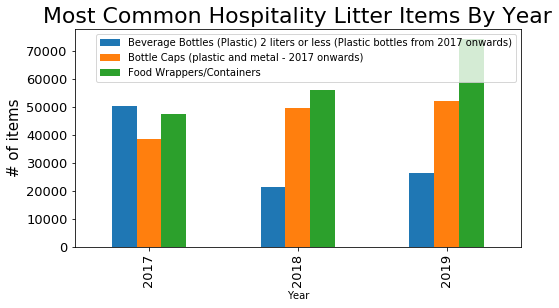

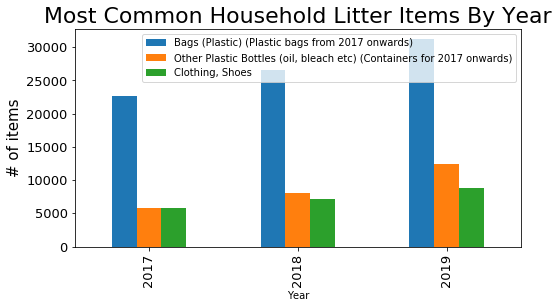

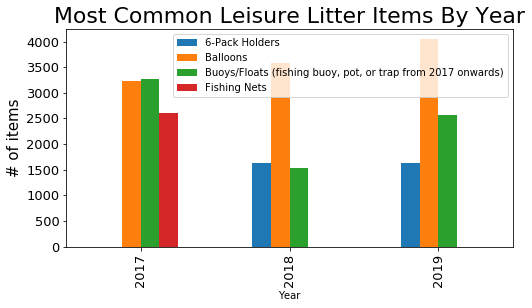

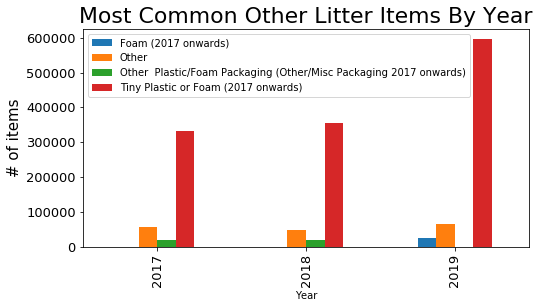

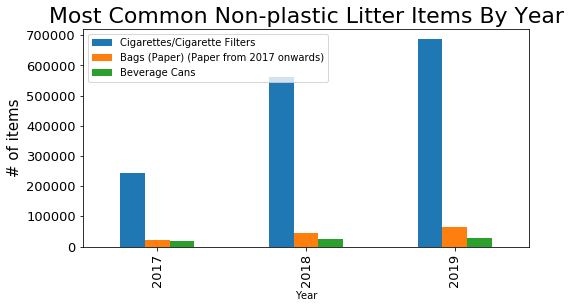

In [23]:
grouped_df = df.groupby(['Year'])[trash_type_columns].sum()
industries = {"Hospitality": hospitality,
                  "Household": household,
                  "Leisure": leisure,
                  "Other": other,
                  "Non-plastic": non_plastic}
for industry in industries:
    in_df = grouped_df[industries[industry]].apply(lambda x: pd.Series(x.nlargest(3)), axis=1)
    ax = in_df.plot(kind='bar', figsize=(8,4), fontsize=13);ax.set_alpha(0.8)
    ax.set_title("Most Common " + industry + " Litter Items By Year", fontsize=22)
    ax.set_ylabel("# of items", fontsize=15);


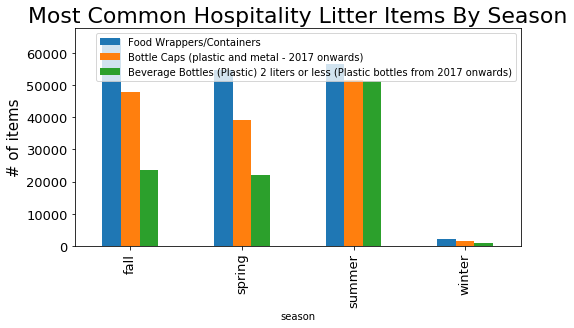

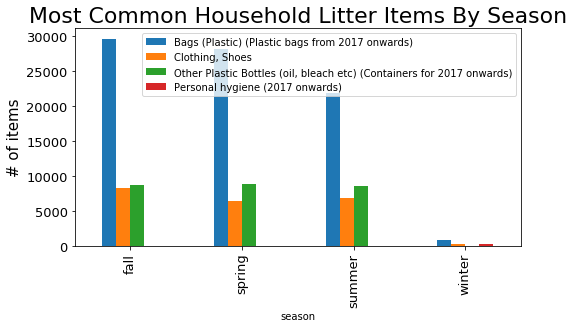

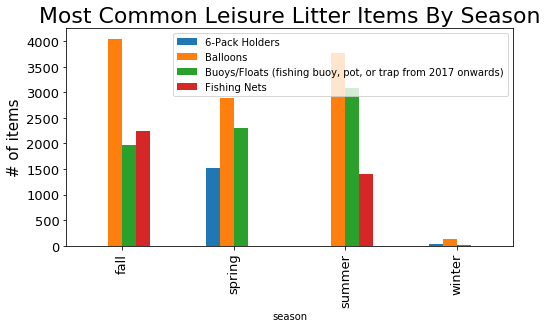

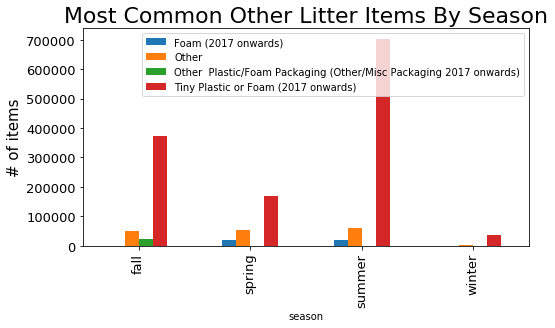

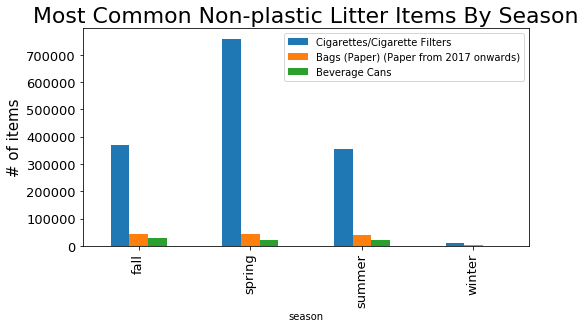

In [24]:
grouped_df = df.groupby(['season'])[trash_type_columns].sum()
for industry in industries:
    in_df = grouped_df[industries[industry]].apply(lambda x: pd.Series(x.nlargest(3)), axis=1)
    ax = in_df.plot(kind='bar', figsize=(8,4), fontsize=13);ax.set_alpha(0.8)
    ax.set_title("Most Common " + industry + " Litter Items By Season", fontsize=22)
    ax.set_ylabel("# of items", fontsize=15);

Grouping types of waste by usage:

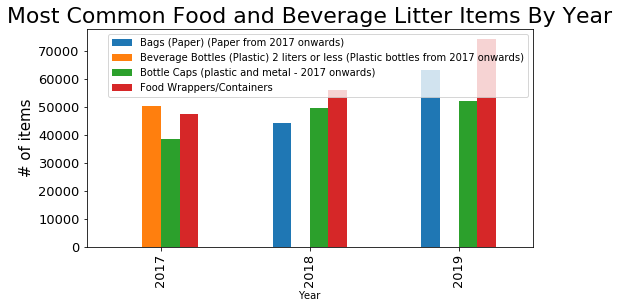

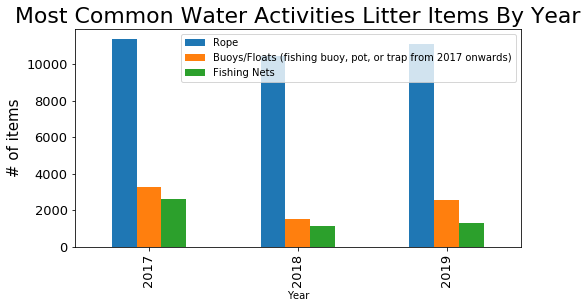

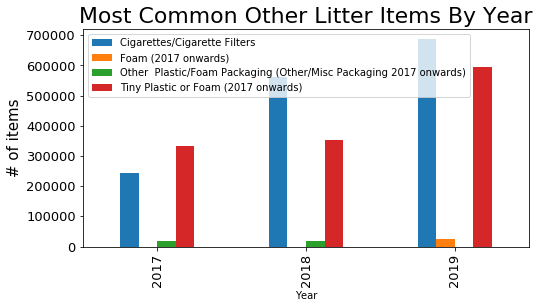

In [58]:
grouped_df = df.groupby(['Year'])[trash_type_columns].sum()
for usage in usages:
    usage_df = grouped_df[usages[usage]].apply(lambda x: pd.Series(x.nlargest(3)), axis=1)
    ax = usage_df.plot(kind='bar', figsize=(8,4), fontsize=13);ax.set_alpha(0.8)
    ax.set_title("Most Common " + usage + " Litter Items By Year", fontsize=22)
    ax.set_ylabel("# of items", fontsize=15);

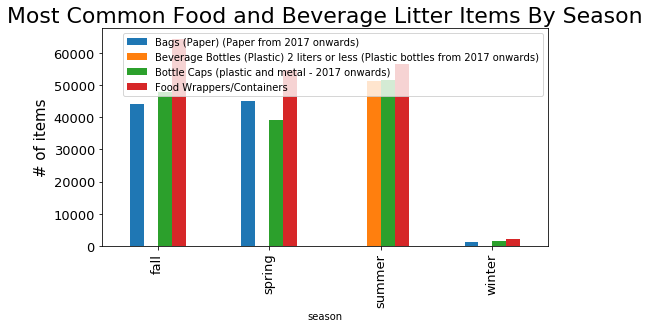

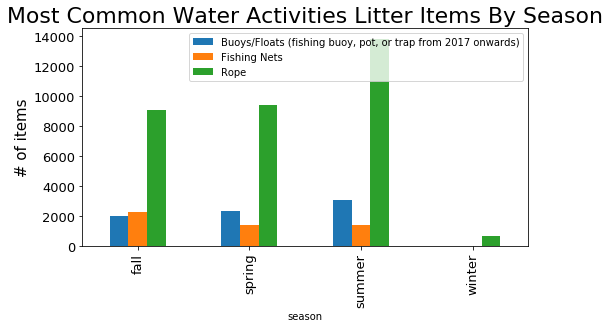

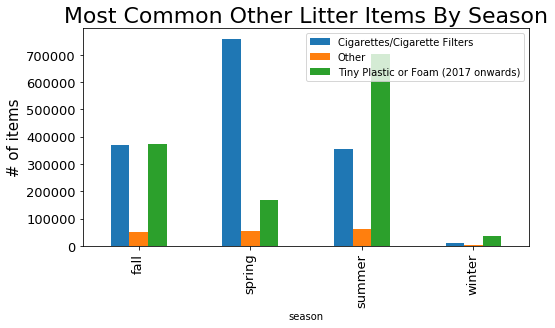

In [26]:
grouped_df = df.groupby(['season'])[trash_type_columns].sum()
for usage in usages:
    usage_df = grouped_df[usages[usage]].apply(lambda x: pd.Series(x.nlargest(3)), axis=1)
    ax = usage_df.plot(kind='bar', figsize=(8,4), fontsize=13);ax.set_alpha(0.8)
    ax.set_title("Most Common " + usage + " Litter Items By Season", fontsize=22)
    ax.set_ylabel("# of items", fontsize=15);

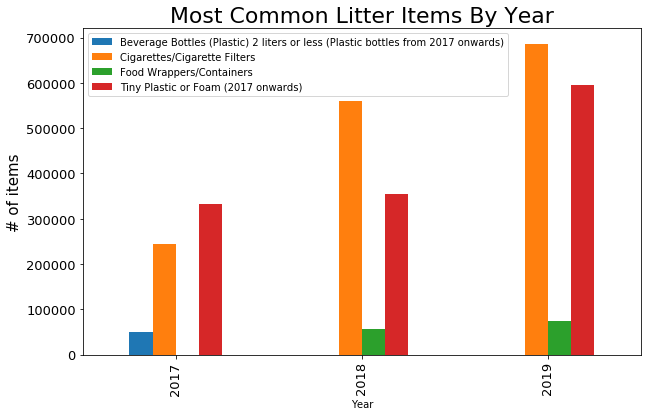

In [67]:
grouped_df = df.groupby(['Year'])[trash_type_columns].sum().apply(lambda x: pd.Series(x.nlargest(3)), axis=1)

ax = grouped_df.plot(kind='bar', figsize=(10,6), fontsize=13);
ax.set_alpha(0.8)
ax.set_title("Most Common Litter Items By Year", fontsize=22)
ax.set_ylabel("# of items", fontsize=15);


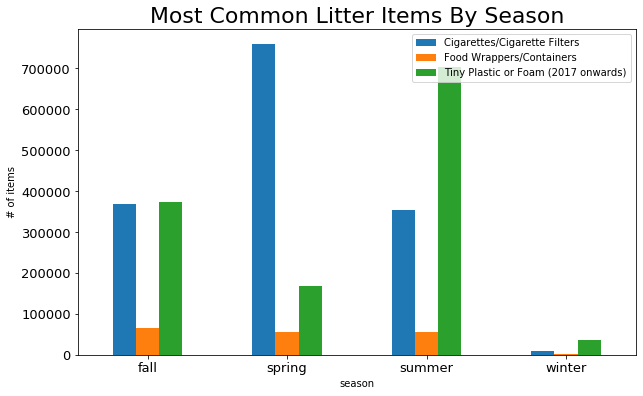

In [66]:
grouped_df = df.groupby(['season'])[trash_type_columns].sum().apply(lambda x: pd.Series(x.nlargest(3)), axis=1).fillna(0)

ax = grouped_df.plot(kind='bar', figsize=(10,6), fontsize=13);
ax.set_alpha(0.8)
ax.set_title("Most Common Litter Items By Season", fontsize=22)
ax.set_ylabel("# of items");
ax.tick_params(labelrotation=0)

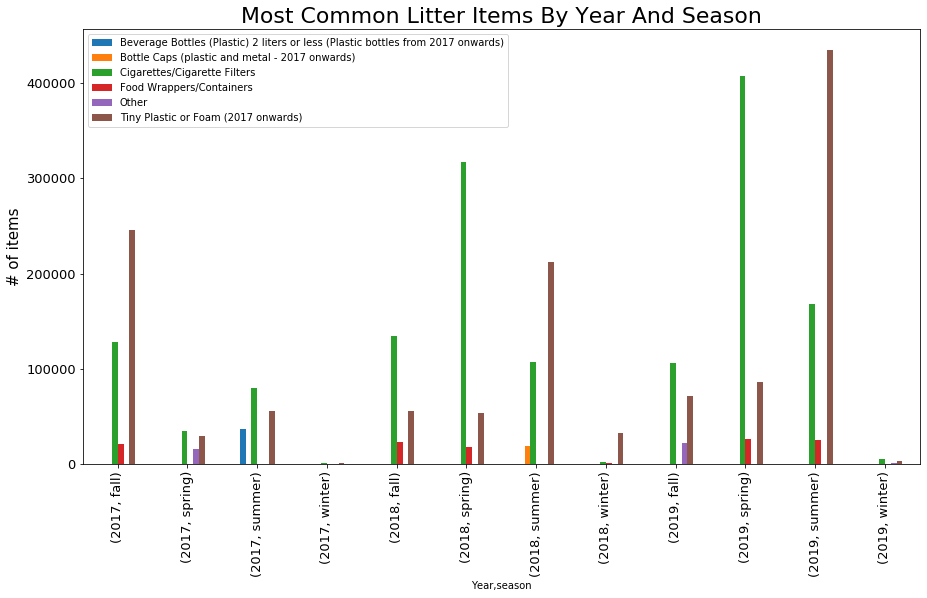

In [29]:
grouped_df = df.groupby(['Year','season'])[trash_type_columns].sum().apply(lambda x: pd.Series(x.nlargest(3)), axis=1).fillna(0)

ax = grouped_df.plot(kind='bar', figsize=(15,8), fontsize=13);
ax.set_alpha(0.8)
ax.set_title("Most Common Litter Items By Year And Season", fontsize=22)
ax.set_ylabel("# of items", fontsize=15);

Looking at the types of waste with the highest increase:

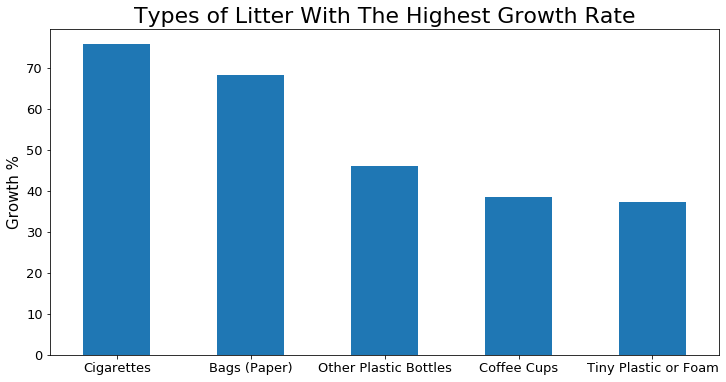

In [60]:
grouped_df = df.groupby(['Year'])[trash_type_columns]
sums = [grouped_df.get_group(x).sum() for x in [2017, 2018, 2019]]
growth_rate_1 = (sums[1] - sums[0]) / sums[0]
growth_rate_2 = (sums[2] - sums[1]) / sums[1]
diff = (growth_rate_1 + growth_rate_2) / 2 * 100
largest_diff = diff.nlargest(5)
ax = largest_diff.plot(kind='bar', figsize=(12,6), fontsize=13);
ax.set_alpha(0.8)
ax.set_title("Types of Litter With The Highest Growth Rate", fontsize=22)
ax.set_ylabel("Growth %", fontsize=15);
ax.set_xticklabels(["Cigarettes", "Bags (Paper)", "Other Plastic Bottles", "Coffee Cups", "Tiny Plastic or Foam"])
ax.tick_params(labelrotation=0)

In [34]:
fig = pxb.bar(largest_diff, title="Types of litter with the highest growth rate")
fig.show()

In [ ]:
list(df.columns.values) 